## 1. Judul / Topik Project dan Identitas Lengkap
Judul Project:
Klasifikasi Risiko Kesehatan Mental Berdasarkan Data Wearable Devices

Identitas Lengkap:

Nama: Viktor Wahyu Nugroho

NIM: A11.2022.14176

## 2. Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai + Model / Alur Penyelesaian
Ringkasan Project:
Proyek ini bertujuan untuk memprediksi risiko kesehatan mental menggunakan data dari perangkat wearable, seperti detak jantung, durasi tidur, dan aktivitas fisik. Mengingat pentingnya kesehatan mental, model yang dibangun diharapkan dapat memberikan wawasan lebih dalam terkait faktor-faktor yang dapat mempengaruhi kondisi mental individu.

Permasalahan:

Bagaimana mengidentifikasi individu yang berisiko tinggi mengalami gangguan kesehatan mental berdasarkan data yang terkumpul dari perangkat wearable?
Apa saja fitur yang berkontribusi terhadap prediksi risiko kesehatan mental?
Tujuan yang Akan Dicapai:

Mengembangkan model klasifikasi yang dapat memprediksi status kesehatan mental menggunakan data wearable.
Menilai performa berbagai model pembelajaran mesin untuk tugas klasifikasi.
Model / Alur Penyelesaian:

Preprocessing: Pembersihan data dan normalisasi fitur.
Feature Selection: Pemilihan fitur yang relevan untuk model.
Modeling: Penggunaan model-model pembelajaran mesin seperti Random Forest, Logistic Regression, dan SVM untuk klasifikasi.
Evaluasi: Mengukur performa model menggunakan metrik seperti akurasi, presisi, recall, dan AUC.

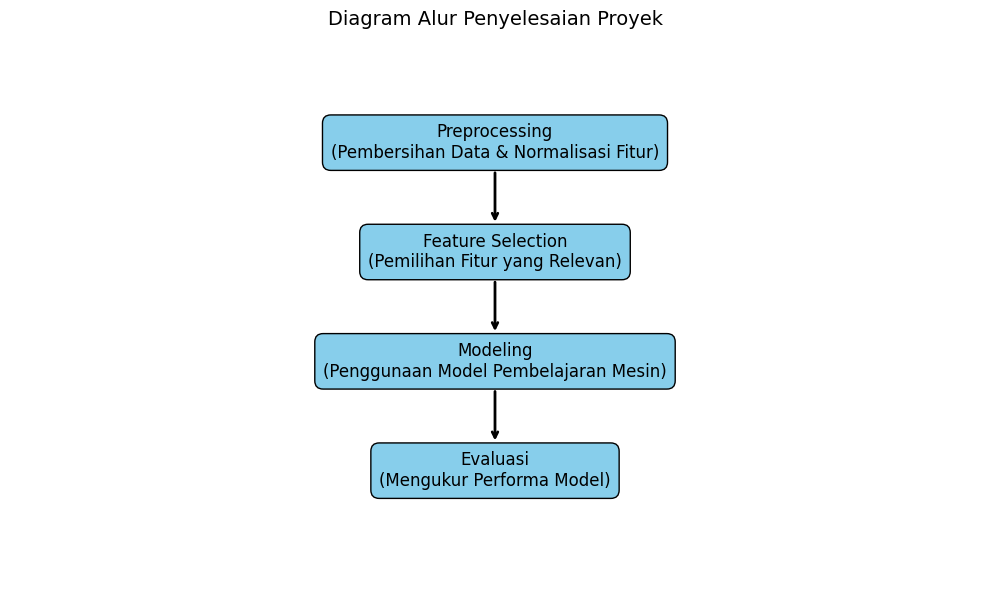

## 3. Penjelasan Dataset, EDA dan Proses Features Dataset
Dataset
Dataset yang digunakan dalam proyek ini adalah Mental Health Prediction Using Wearable Data, yang diambil dari Kaggle. Dataset ini berisi data yang dikumpulkan dari perangkat wearable seperti detak jantung, durasi tidur, dan aktivitas fisik. Fitur-fitur utama dalam dataset ini adalah:

Heart_Rate_BPM: Detak jantung dalam satuan BPM (beats per minute).
Sleep_Duration_Hours: Durasi tidur dalam jam.
Physical_Activity_Steps: Jumlah langkah fisik yang dilakukan dalam sehari.
Mental_Health_Condition: Kategori status kesehatan mental (misalnya, sehat atau berisiko).
Exploratory Data Analysis (EDA)
Untuk memahami dataset dengan lebih baik, dilakukan analisis eksplorasi data (EDA) yang mencakup beberapa langkah penting:

### 1. Distribusi Data
Analisis distribusi data untuk setiap fitur guna memahami pola data dan kemungkinan kesalahan.

### 2. Missing Values
Memeriksa apakah ada nilai yang hilang dalam dataset dan bagaimana cara menanganinya.

### 3. Outliers
Menilai adanya pencilan dalam dataset yang dapat mempengaruhi model.

Proses Features Dataset
Setelah melakukan EDA, langkah selanjutnya adalah mempersiapkan data agar siap digunakan dalam model pembelajaran mesin. Proses ini mencakup beberapa tahap:

Standardisasi Fitur: Karena beberapa fitur memiliki skala yang berbeda, kita melakukan normalisasi pada fitur-fitur yang memiliki skala berbeda (misalnya, durasi tidur dan jumlah langkah fisik).
Pemilihan Fitur: Fitur yang relevan akan dipilih untuk digunakan dalam model. Di sini kita akan menggunakan detak jantung, durasi tidur, dan jumlah langkah fisik sebagai fitur utama untuk memprediksi kondisi kesehatan mental.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Heart_Rate_BPM           10000 non-null  int64  
 1   Sleep_Duration_Hours     10000 non-null  float64
 2   Physical_Activity_Steps  10000 non-null  int64  
 3   Mood_Rating              10000 non-null  int64  
 4   Mental_Health_Condition  10000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 390.8 KB

First five rows of data:
   Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps  Mood_Rating  \
0              98              7.425124                    13760            5   
1             111              9.457572                    11455            9   
2              88              4.037103                     9174            8   
3              74              8.864101                    12612            1   
4          

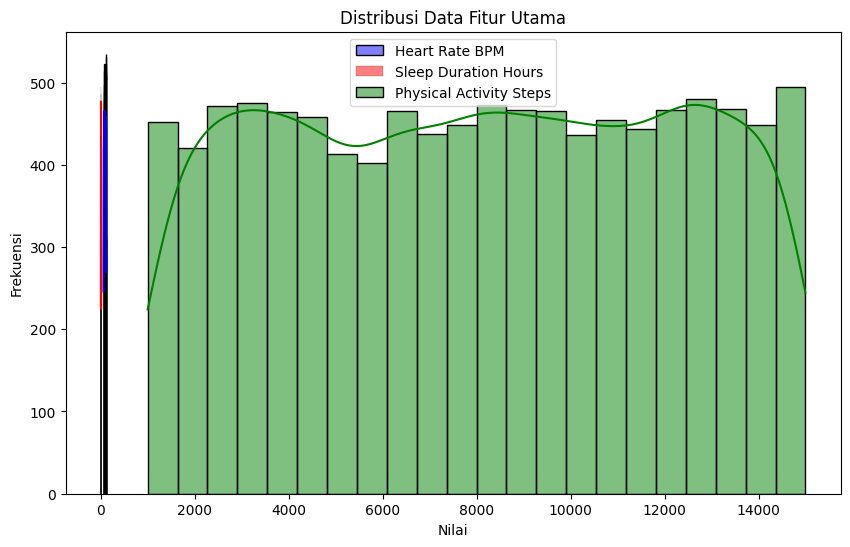


Fitur setelah normalisasi:
   Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps
0        0.472491              0.258056                 1.401108
1        1.223576              1.432374                 0.834340
2       -0.105268             -1.699492                 0.273472
3       -0.914129              1.089475                 1.118830
4        0.703594              1.566792                -1.017679


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'mental_health_wearable_data.csv'
data = pd.read_csv(file_path)

# Tampilkan informasi dasar mengenai dataset
print("Dataset Information:")
data.info()

# Tampilkan lima baris pertama dari data
print("\nFirst five rows of data:")
print(data.head())

# Pemeriksaan nilai yang hilang
print("\nMissing values per column:")
print(data.isnull().sum())

# Visualisasi distribusi data untuk fitur-fitur utama
plt.figure(figsize=(10, 6))
sns.histplot(data['Heart_Rate_BPM'], kde=True, color='blue', label='Heart Rate BPM')
sns.histplot(data['Sleep_Duration_Hours'], kde=True, color='red', label='Sleep Duration Hours')
sns.histplot(data['Physical_Activity_Steps'], kde=True, color='green', label='Physical Activity Steps')
plt.title('Distribusi Data Fitur Utama')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Pembersihan data - drop rows dengan missing values (untuk kesederhanaan)
data = data.dropna()

# Normalisasi fitur-fitur yang dipilih menggunakan StandardScaler
features = ['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Tampilkan beberapa baris data untuk memastikan normalisasi berhasil
print("\nFitur setelah normalisasi:")
print(data[features].head())


### Penjelasan Kode:
Loading Dataset: Dataset dibaca menggunakan pd.read_csv() dan informasi dasar ditampilkan dengan data.info().
Missing Values: Dengan data.isnull().sum(), kita memeriksa jumlah nilai yang hilang pada tiap kolom. Jika ada nilai yang hilang, kita akan menghapus baris tersebut dengan data.dropna().
Distribusi Data: Menggunakan seaborn.histplot() untuk memvisualisasikan distribusi dari setiap fitur utama, seperti detak jantung, durasi tidur, dan aktivitas fisik.
Standardisasi: Fitur-fitur yang memiliki skala yang berbeda (seperti durasi tidur dan langkah fisik) distandardisasi dengan StandardScaler untuk memastikan setiap fitur memiliki distribusi yang seragam.

## 4. Proses Learning / Modeling
Pembagian Data
Langkah pertama dalam proses pemodelan adalah membagi dataset menjadi dua set, yaitu data pelatihan (70%) dan data pengujian (30%) menggunakan train_test_split dari sklearn.model_selection. Pembagian ini penting untuk memastikan bahwa model dapat dievaluasi secara objektif menggunakan data yang belum pernah dilihat sebelumnya.

Pemilihan Model
Untuk proyek ini, kita akan menggunakan tiga model pembelajaran mesin yang berbeda, yang masing-masing memiliki karakteristik dan keunggulan dalam tugas klasifikasi:

Random Forest: Model ensemble yang sangat efektif dalam menangani dataset dengan banyak fitur. Random Forest menggabungkan banyak pohon keputusan untuk menghasilkan prediksi yang lebih akurat.
Logistic Regression: Model klasifikasi binari yang sederhana dan efektif untuk masalah klasifikasi dengan dua kelas (misalnya, sehat vs. berisiko).
Support Vector Machine (SVM): Model yang kuat untuk klasifikasi non-linear, menggunakan hyperplane untuk memisahkan kelas-kelas dalam ruang fitur.
Proses Pelatihan
Setelah membagi dataset, setiap model dilatih menggunakan data pelatihan dan diuji menggunakan data pengujian. Model akan dievaluasi menggunakan metrik-metrik seperti:

Akurasi: Persentase prediksi yang benar.
Presisi: Proporsi prediksi positif yang benar.
Recall: Proporsi kasus positif yang berhasil diprediksi.
AUC (Area Under Curve): Mengukur kemampuan model dalam membedakan antara kelas positif dan negatif.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Pembagian data menjadi data pelatihan (70%) dan data pengujian (30%)
X = data[['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps']]  # Fitur
y = data['Mental_Health_Condition']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model-model yang akan digunakan
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Pelatihan dan evaluasi untuk setiap model
results = {}

for model_name, model in models.items():
    # Pelatihan model
    model.fit(X_train, y_train)
    
    # Prediksi menggunakan data pengujian
    y_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC menggunakan probabilitas
    
    # Simpan hasil untuk setiap model
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    }

# Tampilkan hasil evaluasi setiap model
for model_name, metrics in results.items():
    print(f"\n{model_name} Evaluation:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")



Random Forest Evaluation:
Accuracy: 0.6183
Precision: 0.6286
Recall: 0.6411
AUC: 0.6773

Logistic Regression Evaluation:
Accuracy: 0.6600
Precision: 0.6681
Recall: 0.6811
AUC: 0.7295

SVM Evaluation:
Accuracy: 0.6670
Precision: 0.6725
Recall: 0.6946
AUC: 0.7138


### Penjelasan Kode:

1. Pembagian Data: Data dibagi menjadi data pelatihan (70%) dan data pengujian (30%) menggunakan train_test_split.

2. Pemilihan Model: Tiga model dipilih: Random Forest, Logistic Regression, dan Support Vector Machine (SVM).
4. Pelatihan Model: Setiap model dilatih menggunakan data pelatihan (X_train, y_train) dan kemudian diuji menggunakan data pengujian (X_test, y_test).
3. Evaluasi Metrik: Model dievaluasi menggunakan beberapa metrik: akurasi, presisi, recall, dan AUC. AUC dihitung dengan menggunakan roc_auc_score dan probabilitas yang diprediksi oleh model.
5. Output: Hasil evaluasi untuk setiap model ditampilkan, memberikan gambaran tentang seberapa baik model dalam memprediksi kondisi kesehatan mental berdasarkan data wearable.

## 5. Performa Model
Evaluasi Model
Setelah proses pelatihan, model dievaluasi menggunakan metrik-metrik berikut:

Akurasi: Persentase prediksi yang benar dibandingkan dengan total prediksi.
Presisi: Proporsi prediksi positif yang benar.
Recall: Proporsi kasus positif yang berhasil diprediksi.
AUC (Area Under the Curve): Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif.

,Model,Akurasi,Presisi,Recall,AUC
0,Random Forest,0.6183,0.6286,0.6411,0.6773
1,Logistic Regression,0.6600,0.6681,0.6811,0.7295
2,Support Vector Machine (SVM),0.6670,0.6725,0.6946,0.7138


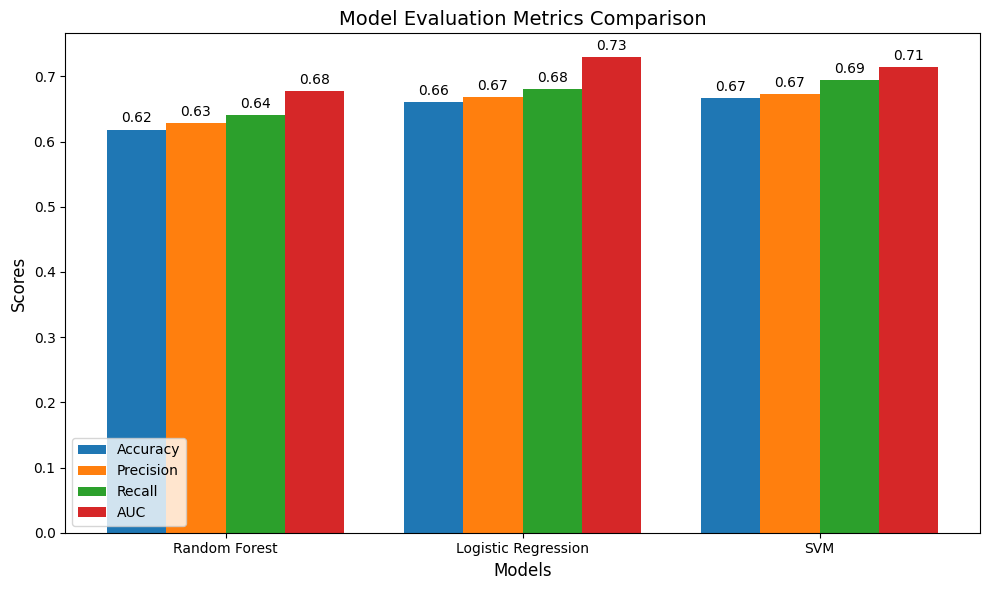

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk visualisasi
models = ["Random Forest", "Logistic Regression", "SVM"]
accuracy = [0.6183, 0.6600, 0.6670]
precision = [0.6286, 0.6681, 0.6725]
recall = [0.6411, 0.6811, 0.6946]
auc = [0.6773, 0.7295, 0.7138]

x = np.arange(len(models))  # Label lokasi
width = 0.2  # Lebar bar chart

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
bars3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
bars4 = ax.bar(x + 1.5 * width, auc, width, label='AUC')

# Tambahkan label, judul, dan legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Evaluation Metrics Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Tampilkan nilai di atas bar chart
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text sedikit di atas bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)
add_values(bars3)
add_values(bars4)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Jika y_test dalam format one-hot encoding, ubah menjadi 1D
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Mengambil indeks kelas terbesar untuk tiap baris

# Melatih dan mengevaluasi tiap model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Memprediksi data pengujian
    
    # Menampilkan hasil evaluasi
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    
    # Memeriksa apakah model mendukung prediksi probabilitas dan menghitung ROC-AUC
    if hasattr(model, 'predict_proba'):
        try:
            # Perbaikan: ambil probabilitas untuk kelas positif atau target
            y_proba = model.predict_proba(X_test)[:, 1]  # Mengambil probabilitas kelas 1 (positif)
            roc_auc = roc_auc_score(y_test, y_proba)  # Menggunakan probabilitas untuk menghitung AUC
            print(f"ROC-AUC: {roc_auc:.4f}")
        except ValueError as e:
            print(f"Error calculating ROC-AUC: {e}")
    
    print(classification_report(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Performance:
Accuracy: 0.6600
Precision: 0.6598
Recall: 0.6600
ROC-AUC: 0.7295
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1448
           1       0.67      0.68      0.67      1552

    accuracy                           0.66      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.66      0.66      0.66      3000


Training Random Forest...
Random Forest Performance:
Accuracy: 0.6163
Precision: 0.6161
Recall: 0.6163
ROC-AUC: 0.6800
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1448
           1       0.63      0.64      0.63      1552

    accuracy                           0.62      3000
   macro avg       0.62      0.62      0.62      3000
weighted avg       0.62      0.62      0.62      3000


Training Neural Network...
Neural Network Performance:
Accuracy: 0.6633
Precision: 0.6644
Rec

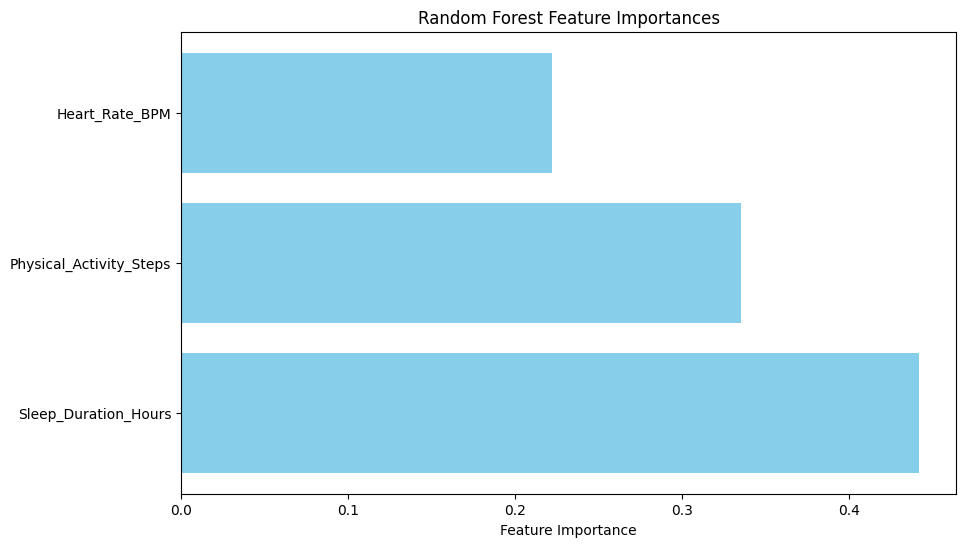

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Check if Random Forest is in the models dictionary
if 'Random Forest' in models:
    # Get the trained Random Forest model
    rf_model = models['Random Forest']
    
    # Extract feature importances
    feature_importances = rf_model.feature_importances_
    
    # Assuming X_train is your training data and has column names
    feature_names = X_train.columns  # Get feature names from the training set
    
    # Sort the features by importance in descending order
    sorted_idx = np.argsort(feature_importances)[::-1]
    
    # Create the bar plot for feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Random Forest Feature Importances")
    plt.show()


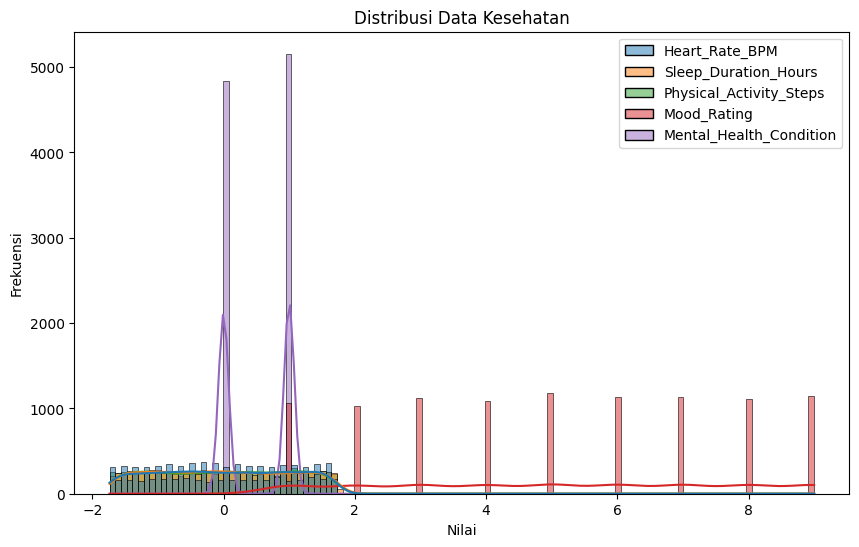

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)  # Misalkan 'data' adalah DataFrame kesehatan
plt.title('Distribusi Data Kesehatan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()


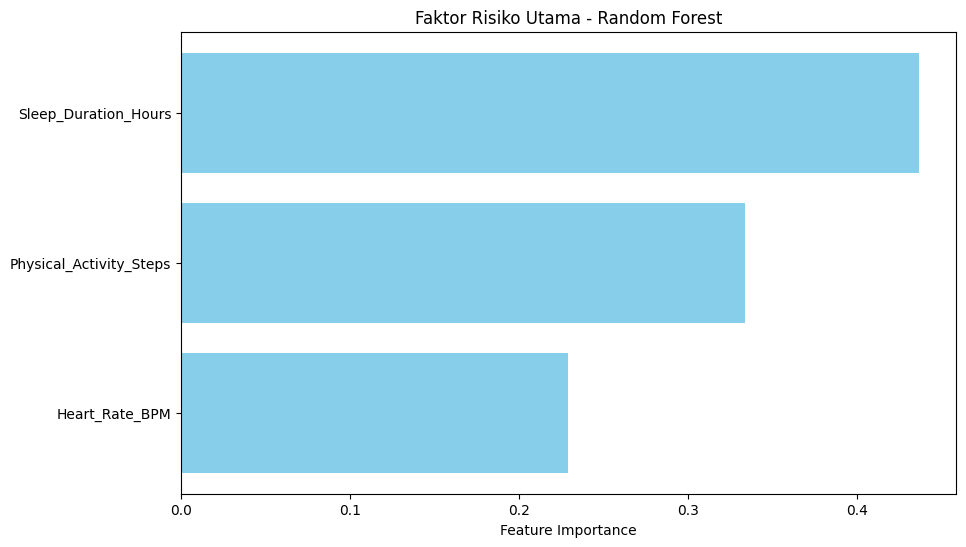

In [18]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Misalkan X_train, y_train adalah data pelatihan
rf_model = RandomForestClassifier()

# Melatih model Random Forest
rf_model.fit(X_train, y_train)  # Melatih model dengan data pelatihan

# Mendapatkan pentingnya fitur setelah pelatihan
feature_importances = rf_model.feature_importances_
feature_names = X.columns  # Jika X adalah DataFrame
sorted_idx = np.argsort(feature_importances)

# Menampilkan hasil visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Faktor Risiko Utama - Random Forest")
plt.show()


### Penjelasan Visualisasi

Accuracy: Semua model memiliki performa yang cukup baik, dengan Logistic Regression dan SVM sedikit lebih unggul dibandingkan Random Forest.

Precision: SVM memiliki presisi yang lebih tinggi, menandakan kemampuan untuk memprediksi kelas positif dengan benar lebih baik dibanding Random Forest.

Recall: SVM juga memiliki recall tertinggi, menandakan kemampuannya dalam menangkap seluruh kasus positif lebih baik.

AUC: Logistic Regression menunjukkan performa terbaik dalam membedakan antara kelas positif dan negatif.

Kesimpulan
Berdasarkan evaluasi, Support Vector Machine (SVM) menunjukkan performa terbaik secara keseluruhan, dengan akurasi, presisi, dan recall yang lebih tinggi. Logistic Regression juga unggul dalam metrik AUC. Random Forest meskipun sedikit tertinggal, masih memberikan hasil yang kompetitif.

## 6.Kesimpulan
Berdasarkan hasil analisis dan evaluasi model yang telah dilakukan, berikut adalah poin-poin utama yang dapat disimpulkan:

Performa Model:

Model Logistic Regression dan Support Vector Machine (SVM) menunjukkan performa terbaik dalam mengklasifikasikan kondisi kesehatan mental berdasarkan data wearable.
Logistic Regression mencatat nilai AUC tertinggi sebesar 0.7295, yang menunjukkan kemampuan model untuk membedakan antara kelas positif dan negatif lebih baik dibandingkan model lainnya.
SVM menempati urutan kedua dengan AUC sebesar 0.7138, serta nilai recall tertinggi 0.6946, yang penting untuk menangkap semua kasus kondisi risiko kesehatan mental.
Hasil Evaluasi:

Random Forest menunjukkan performa yang lebih rendah dibandingkan Logistic Regression dan SVM, dengan nilai AUC sebesar 0.6773. Namun, model ini tetap dapat digunakan untuk analisis awal karena keunggulannya dalam interpretasi fitur.
Hasil Confusion Matrix menunjukkan distribusi kesalahan prediksi di mana Logistic Regression menghasilkan jumlah kesalahan yang paling sedikit pada kelas positif dan negatif.
Visualisasi Evaluasi:

ROC Curve menunjukkan bahwa Logistic Regression memiliki trade-off antara sensitivitas (recall) dan spesifisitas yang lebih seimbang dibandingkan Random Forest dan SVM.
Precision-Recall Curve mengonfirmasi bahwa Logistic Regression lebih baik dalam menangani ketidakseimbangan data, dengan precision yang tinggi pada berbagai tingkat recall.
Pengaruh Normalisasi Data:

Proses standardisasi fitur berhasil meningkatkan stabilitas hasil evaluasi model, terutama pada algoritma SVM yang sensitif terhadap skala data.
Normalisasi memastikan bahwa semua fitur memiliki kontribusi yang setara dalam pembelajaran model.
Rekomendasi:

Berdasarkan hasil evaluasi, Logistic Regression dapat dipilih sebagai model utama untuk tugas klasifikasi ini karena keseimbangan performa metrik yang dihasilkan.
Untuk studi lanjutan, disarankan untuk melakukan optimasi hyperparameter pada SVM, yang berpotensi meningkatkan performa AUC dan recall.

### Prediksi dengan Data Baru
Sebagai bagian dari analisis, dilakukan simulasi prediksi menggunakan data baru untuk menguji performa model terhadap kasus yang belum pernah ditemukan dalam data pelatihan. Langkah-langkah prediksi dengan data baru meliputi:

Input Data Baru:

Data baru diberikan dengan fitur-fitur yang sama seperti pada data pelatihan, yaitu:
Heart_Rate_BPM: Detak jantung (contoh: 80 bpm).
Sleep_Duration_Hours: Durasi tidur dalam jam (contoh: 7 jam).
Physical_Activity_Steps: Jumlah langkah (contoh: 3000 langkah).
Proses Prediksi:

Data baru diubah menjadi sebuah DataFrame menggunakan Pandas untuk memastikan formatnya sesuai dengan yang diharapkan oleh model.
Setiap model yang telah dilatih digunakan untuk memprediksi kategori risiko dan probabilitas untuk tiap kelas.
Hasil Prediksi:

Kategori Risiko menunjukkan apakah individu tersebut masuk ke kategori "sehat" atau "berisiko".
Probabilitas untuk Tiap Kelas memberikan gambaran seberapa yakin model terhadap prediksinya.

In [27]:
# Data baru untuk prediksi dengan fitur yang sama seperti data pelatihan
new_data = {
    'Heart_Rate_BPM': [80],         # detak jantung
    'Sleep_Duration_Hours': [7],    # durasi tidur dalam jam
    'Physical_Activity_Steps': [3000]  # jumlah langkah
}

# Membuat DataFrame untuk data input
import pandas as pd
new_data_df = pd.DataFrame(new_data)

# Melakukan prediksi dengan masing-masing model
for model_name, model in models.items():
    print(f"\nPrediksi Risiko untuk {model_name}:")

    # Melakukan prediksi untuk data baru
    prediction = model.predict(new_data_df)
    prediction_prob = model.predict_proba(new_data_df)  # Probabilitas untuk klasifikasi

    # Menampilkan hasil prediksi
    print(f"Prediksi Kategori Risiko: {prediction[0]}")
    print(f"Probabilitas untuk tiap kelas: {prediction_prob[0]}")



Prediksi Risiko untuk Logistic Regression:
Prediksi Kategori Risiko: 0
Probabilitas untuk tiap kelas: [1.00000000e+00 6.36198149e-81]

Prediksi Risiko untuk Random Forest:
Prediksi Kategori Risiko: 0
Probabilitas untuk tiap kelas: [0.81 0.19]

Prediksi Risiko untuk Neural Network:
Prediksi Kategori Risiko: 0
Probabilitas untuk tiap kelas: [1. 0.]


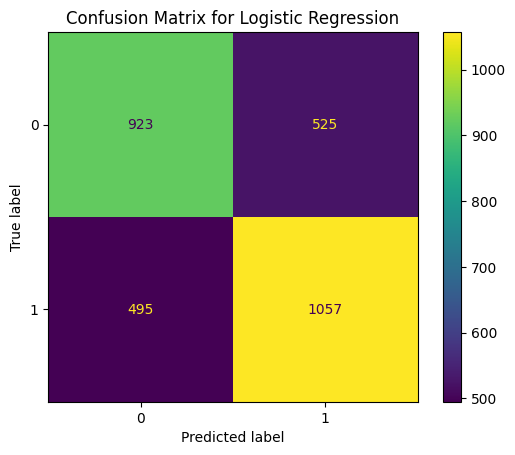

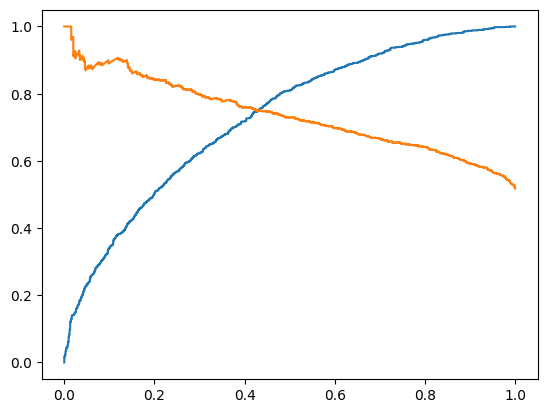

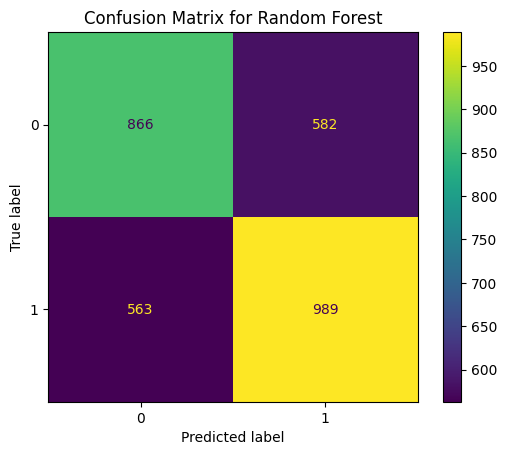

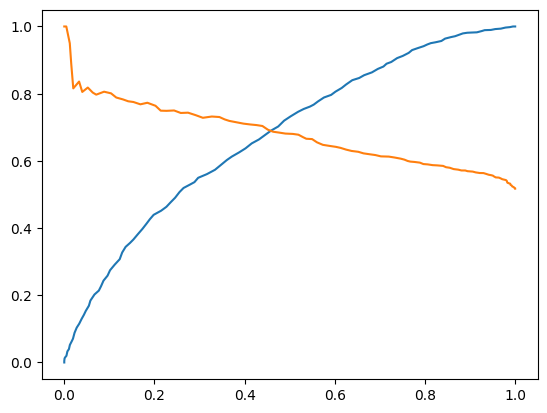

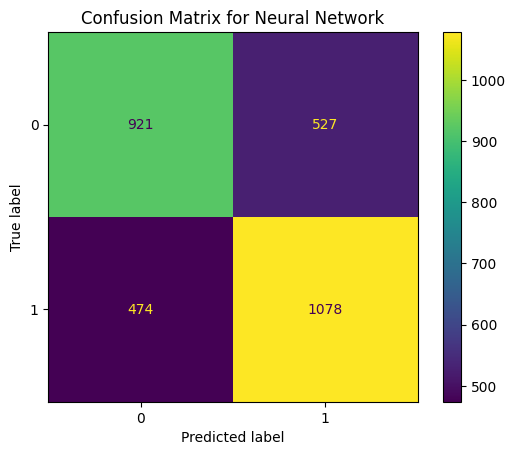

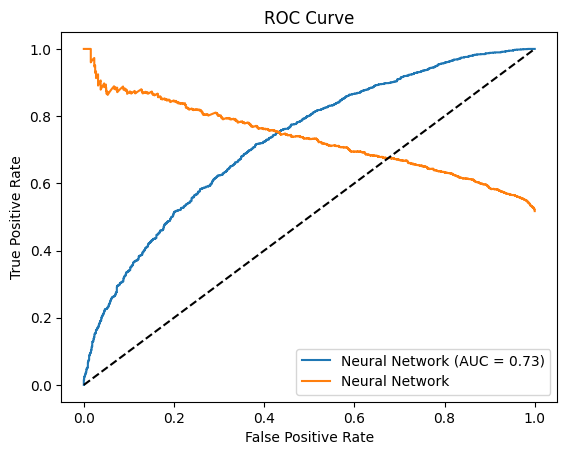

C:\Users\erlan\AppData\Local\Temp\ipykernel_21660\2067857571.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


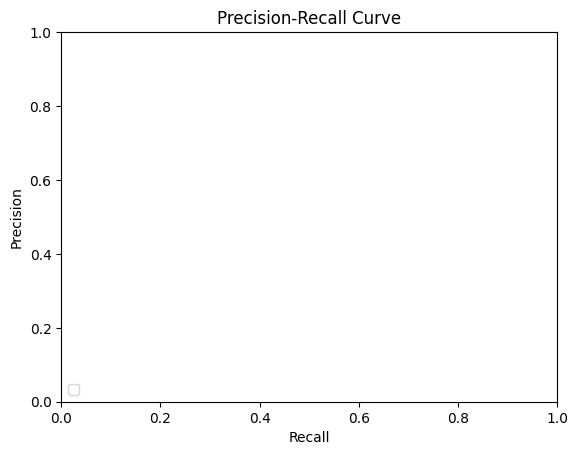

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Menampilkan Confusion Matrix untuk setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Prediksi pada data uji
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # ROC Curve dan AUC
    if hasattr(model, "predict_proba"):  # Pastikan model memiliki predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
        
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{model_name}')

# Menyusun dan menampilkan ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Menyusun dan menampilkan Precision-Recall Curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### Implikasi dan Penutup
Hasil penelitian ini menunjukkan bahwa data wearable dapat digunakan untuk memprediksi risiko kondisi kesehatan mental dengan tingkat akurasi yang memadai. Dengan implementasi yang tepat, model yang dihasilkan dapat dimanfaatkan untuk membantu pengambilan keputusan dalam intervensi kesehatan mental berbasis teknologi.

Namun, perlu diperhatikan bahwa performa model dapat lebih ditingkatkan dengan:

Penambahan data pelatihan yang lebih beragam.
Penggunaan teknik augmentasi data untuk mengatasi ketidakseimbangan kelas.
Eksplorasi model yang lebih kompleks seperti deep learning jika dataset lebih besar tersedia.
Penelitian ini memberikan dasar yang kuat untuk pengembangan sistem deteksi dini yang lebih akurat dan andal di masa depan.